In [1]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime, timedelta

## For SDK
import getpass
from odp_sdk import ODPClient
from CastFunctions import *
from DataStatsFunctions import *
# import data_stats_functions as stats_func

## For plotting
import seaborn as sns
import matplotlib.pyplot as plt
import mpl_toolkits
from mpl_toolkits.basemap import Basemap, addcyclic, shiftgrid
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cfeature
import cmocean
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.lines import Line2D

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set_palette(sns.color_palette("bright"))
import warnings
warnings.filterwarnings("ignore")

# Connect to API

In [2]:
client = ODPClient(api_key=getpass(prompt='Insert your personal ODP API key:'), 
                       project="odp", client_name="odp")

Insert your personal ODP API key:········


# Pull data for desired lat/lon and timespan
Don't forget to specify if you want flagged data included or excluded

In [3]:
df=client.casts(longitude=[-10,35],
                latitude=[50,80], 
                timespan=['2018-06-01','2018-08-31'],
                n_threads=35) 

Locating available casts..
-> 8326 casts found
-> 869012 data rows downloaded in 167.97s


In [4]:
df.head()

,date,lat,lon,z,z_WODflag,z_origflag,Oxygen,Oxygen_WODflag,Oxygen_origflag,Temperature,Temperature_WODflag,Temperature_origflag,Salinity,Salinity_WODflag,Salinity_origflag,Chlorophyll,Chlorophyll_WODflag,Chlorophyll_origflag,Pressure,Pressure_WODflag,Pressure_origflag,Nitrate,Nitrate_WODflag,Nitrate_origflag,pH,pH_WODflag,pH_origflag,Latitude,Latitude_WODflag,Latitude_origflag,Longitude,Longitude_WODflag,Longitude_origflag,JulianDay,JulianDay_WODflag,JulianDay_origflag,externalId,datetime
0,20180828,56.19,1.997,7.0,0,NaN,NaN,NaN,NaN,16.43,0.0,NaN,35.049999,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cast_wod_3_2018_32727_18913246,2018-08-28
1,20180828,56.19,1.997,9.0,0,NaN,NaN,NaN,NaN,16.43,0.0,NaN,35.049999,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cast_wod_3_2018_32727_18913246,2018-08-28
2,20180828,56.19,1.997,10.0,0,NaN,NaN,NaN,NaN,16.43,0.0,NaN,35.049999,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cast_wod_3_2018_32727_18913246,2018-08-28
3,20180828,56.19,1.997,11.0,0,NaN,NaN,NaN,NaN,16.43,0.0,NaN,35.049999,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cast_wod_3_2018_32727_18913246,2018-08-28
4,20180828,56.19,1.997,12.0,0,NaN,NaN,NaN,NaN,16.43,0.0,NaN,35.049999,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cast_wod_3_2018_32727_18913246,2018-08-28


# Use built-in functions to get a sense of the data present

In [5]:
missing_values(df, var_list = ['Oxygen', 'Temperature', 'Salinity', 'Chlorophyll','pH', 'Nitrate'])

,Variables,Null Values,Percentage Missing
0,Temperature,383,0.04
1,Salinity,34949,4.02
2,Oxygen,783823,90.20
3,Chlorophyll,844011,97.12
4,Nitrate,867883,99.87
5,pH,867944,99.88


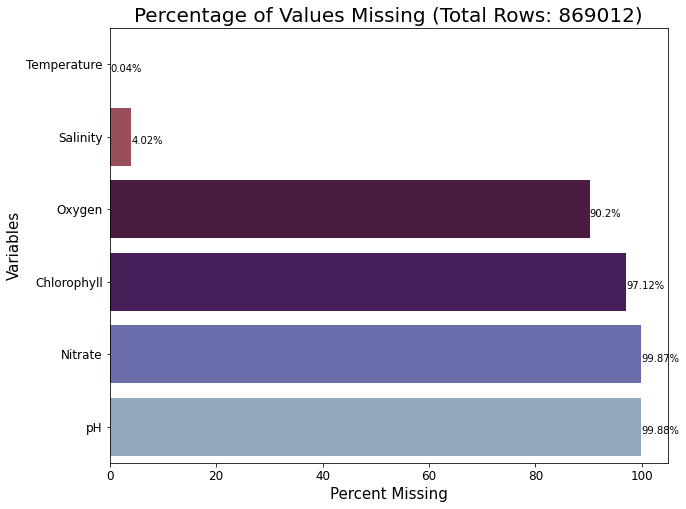

In [6]:
plot_missing(df, var_list = ['Oxygen', 'Temperature', 'Salinity', 'Chlorophyll', 'pH', 'Nitrate'])

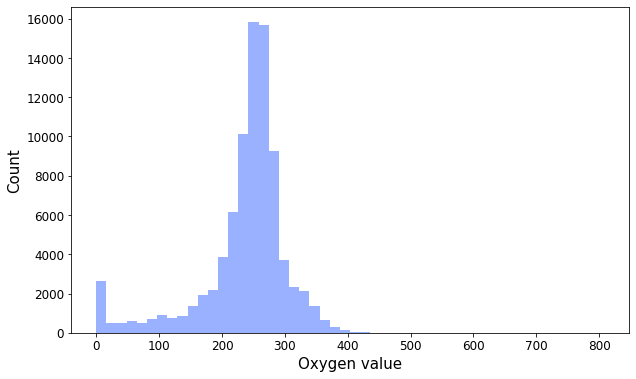

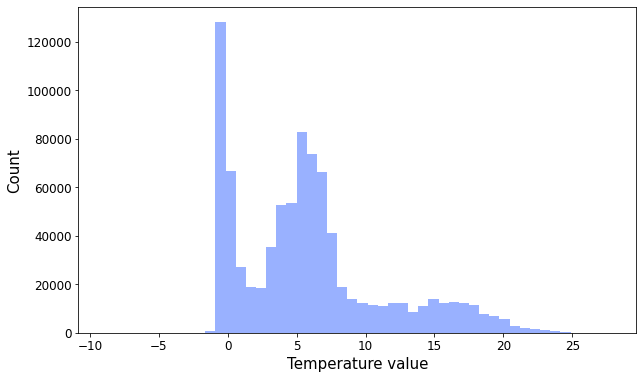

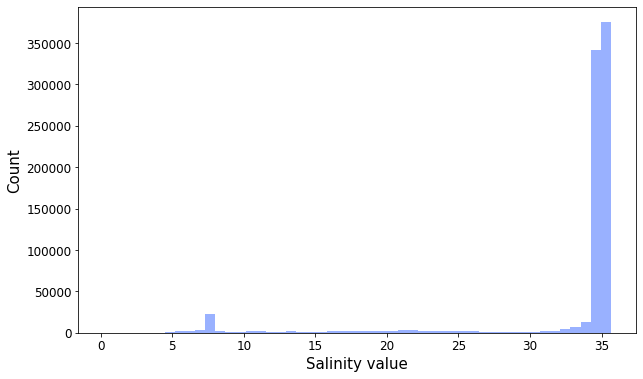

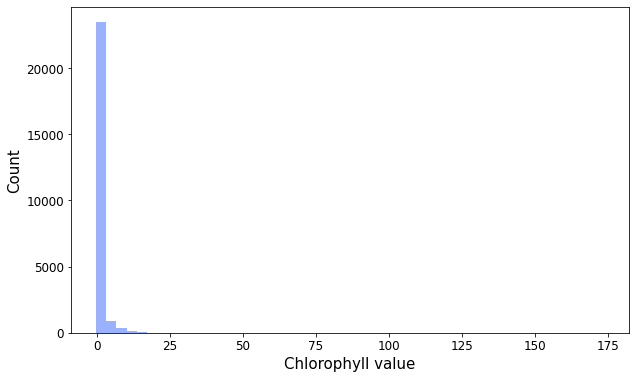

In [7]:
plot_distributions(df, var_list = ['Oxygen', 'Temperature', 'Salinity', 'Chlorophyll'])

# Get units for each variable

In [8]:
get_units()

{'z': 'm',
 'Oxygen': 'umol/kg',
 'Temperature': 'degree_C',
 'Chlorophyll': 'ugram/l',
 'Pressure': 'dbar',
 'Nitrate': 'umol/kg',
 'Latitude': 'degrees_north',
 'Longitude': 'degrees_east'}

# Plot casts for specific variable
Here we do Temperature and Oxygen. You can specify the colormap you want to use

In [9]:
## available colormaps through cmocean
cmocean.cm.cmapnames

['thermal',
 'haline',
 'solar',
 'ice',
 'gray',
 'oxy',
 'deep',
 'dense',
 'algae',
 'matter',
 'turbid',
 'speed',
 'amp',
 'tempo',
 'rain',
 'phase',
 'topo',
 'balance',
 'delta',
 'curl',
 'diff',
 'tarn']

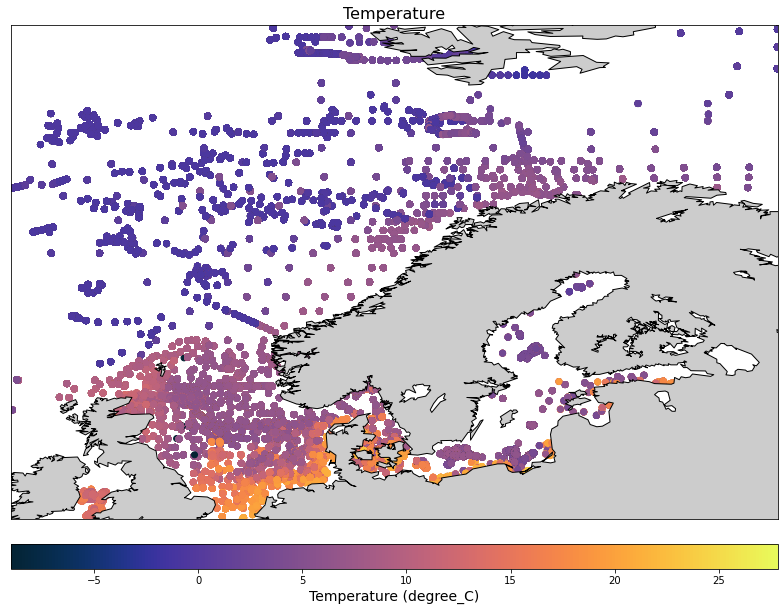

In [10]:
plot_casts('Temperature',df,cmap=cmocean.cm.thermal)


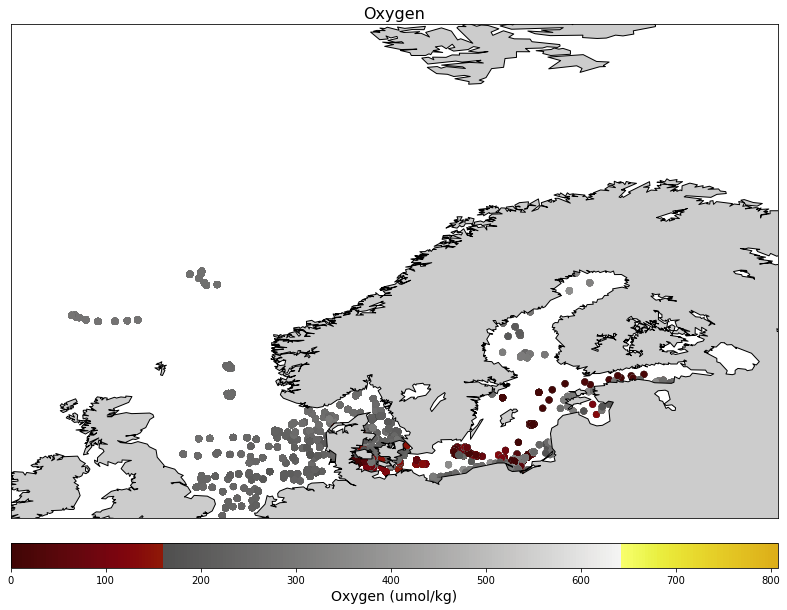

In [11]:
plot_casts('Oxygen',df,cmap=cmocean.cm.oxy)


# Let's take a look at some metadata
Get call casts from 2018

In [12]:
casts2018 = client.get_available_casts(2018,2018)

In [13]:
casts2018.head()

,date,lon,extId,time,dataset_code,geo_index,lat
cast_wod_3_2018_82_18864723,20180922,-180.0,cast_wod_3_2018_82_18864723,90844.0,mrb,82,-8.0
cast_wod_3_2018_88_18864693,20180922,-180.0,cast_wod_3_2018_88_18864693,90844.0,mrb,88,-2.0
cast_wod_3_2018_92_18864600,20180921,-180.0,cast_wod_3_2018_92_18864600,90843.0,mrb,92,2.0
cast_wod_3_2018_95_18864361,20180918,-180.0,cast_wod_3_2018_95_18864361,90840.0,mrb,95,5.0
cast_wod_3_2018_95_18865207,20180928,-180.0,cast_wod_3_2018_95_18865207,90850.0,mrb,95,5.0


# Plot modes of data collection for each cast

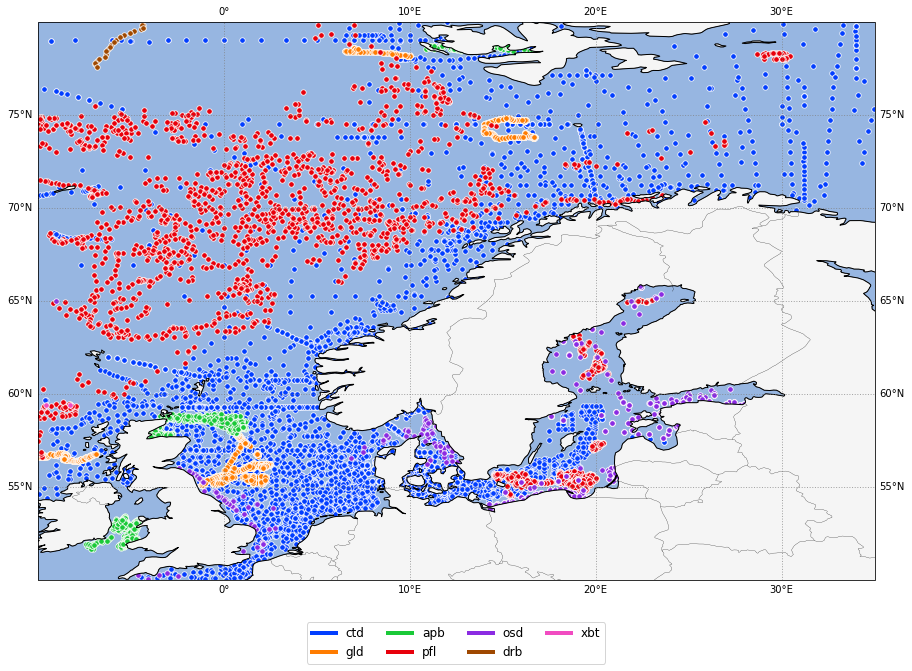

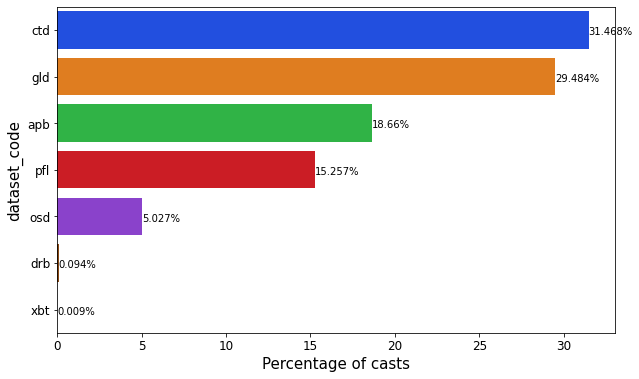

In [14]:
plot_datasets(casts2018, variable='dataset_code', longitude=[-10,35],latitude=[50,80])

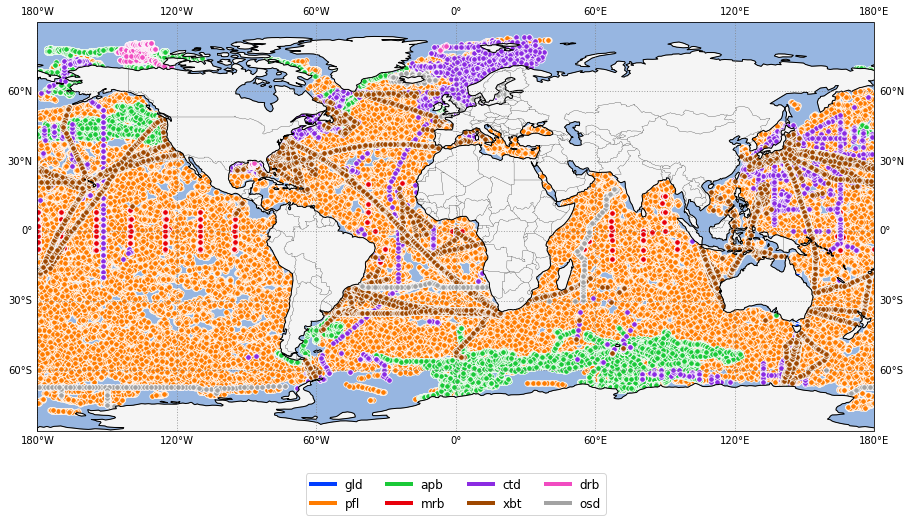

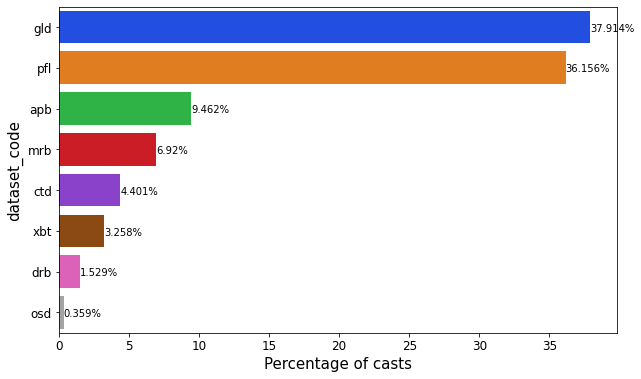

In [15]:
plot_datasets(casts2018, variable='dataset_code')